In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Data.zip

Archive:  /content/drive/MyDrive/Data.zip
   creating: Data/
   creating: Data/.ipynb_checkpoints/
   creating: Data/NORMAL/
  inflating: Data/NORMAL/NORMAL_983.png  
  inflating: Data/NORMAL/NORMAL_984.png  
  inflating: Data/NORMAL/NORMAL_992.png  
  inflating: Data/NORMAL/NORMAL_953.png  
  inflating: Data/NORMAL/NORMAL_961.png  
  inflating: Data/NORMAL/NORMAL_954.png  
  inflating: Data/NORMAL/NORMAL_96.png  
  inflating: Data/NORMAL/NORMAL_98.png  
  inflating: Data/NORMAL/NORMAL_997.png  
  inflating: Data/NORMAL/NORMAL_943.png  
  inflating: Data/NORMAL/NORMAL_927.png  
  inflating: Data/NORMAL/NORMAL_962.png  
  inflating: Data/NORMAL/NORMAL_933.png  
  inflating: Data/NORMAL/NORMAL_914.png  
  inflating: Data/NORMAL/NORMAL_919.png  
  inflating: Data/NORMAL/NORMAL_916.png  
  inflating: Data/NORMAL/NORMAL_880.png  
  inflating: Data/NORMAL/NORMAL_897.png  
  inflating: Data/NORMAL/NORMAL_859.png  
  inflating: Data/NORMAL/NORMAL_913.png  
  inflating: Data/NORMAL/NORMAL_873.p

In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as t

In [6]:
!rm -r /content/Data/.ipynb_checkpoints

In [32]:
Dataset = ImageFolder("/content/Data", transform = t.Compose([
    t.Resize((224,224)),
    t.ToTensor(),
]))

In [33]:
from torch.utils.data import random_split
train_dataset, test_dataset = random_split(Dataset, [int(len(Dataset) * 0.9), len(Dataset) - int(len(Dataset) * 0.9)])

In [34]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [35]:
batch = next(iter(train_dataloader))

In [36]:
images=batch[0]
labels=batch[1]

In [37]:
print(f"Shape of image is :{images.shape}")
print(f"Shape of label is :{labels.shape}")

Shape of image is :torch.Size([32, 3, 224, 224])
Shape of label is :torch.Size([32])


labels : tensor([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0,
        0, 2, 2, 1, 0, 2, 0, 2])


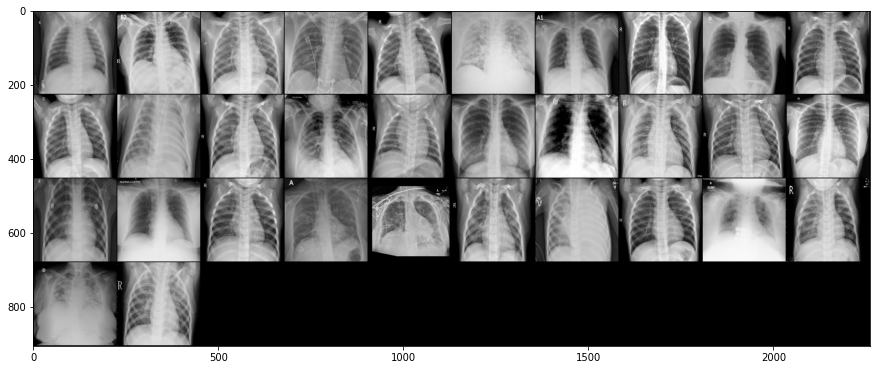

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"labels : {labels}")

In [39]:
test_batch = next(iter(test_dataloader))
test_images=test_batch[0]
test_labels=test_batch[1]
print(f"Shape of test image is :{test_images.shape}")
print(f"Shape of test label is :{test_labels.shape}")

Shape of test image is :torch.Size([32, 3, 224, 224])
Shape of test label is :torch.Size([32])


test labels : tensor([2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 2, 0, 0])


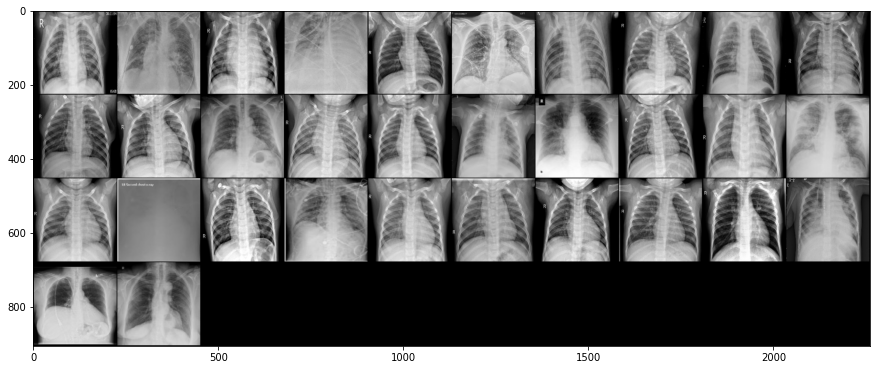

In [40]:
grid = torchvision.utils.make_grid(test_images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(f"test labels : {test_labels}")